In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df

v.id  on road old  on road now  years      km  rating  condition  \
0       1       535651       798186      3   78945       1          2   
1       2       591911       861056      6  117220       5          9   
2       3       686990       770762      2  132538       2          8   
3       4       573999       722381      4  101065       4          3   
4       5       691388       811335      6   61559       3          9   
..    ...          ...          ...    ...     ...     ...        ...   
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top speed   hp  torque  current price  
0         14        177   73     123       351318.0  
1          9        148   74      95       285001.5  
2         15        181   53      97       215386.0  
3         11        197   54     116       244295.5  
4         12        160   53     105       531114.5  
..       ...        ...  ...     ...            ...  
995       11        171   95      97       190744.0  
996       14        161  101     120       419748.0  
997        9        196  113      89       405871.0  
998        9        184  112     128        74398.0  
999        8        199   99      96       414938.5  

[1000 rows x 12 columns]

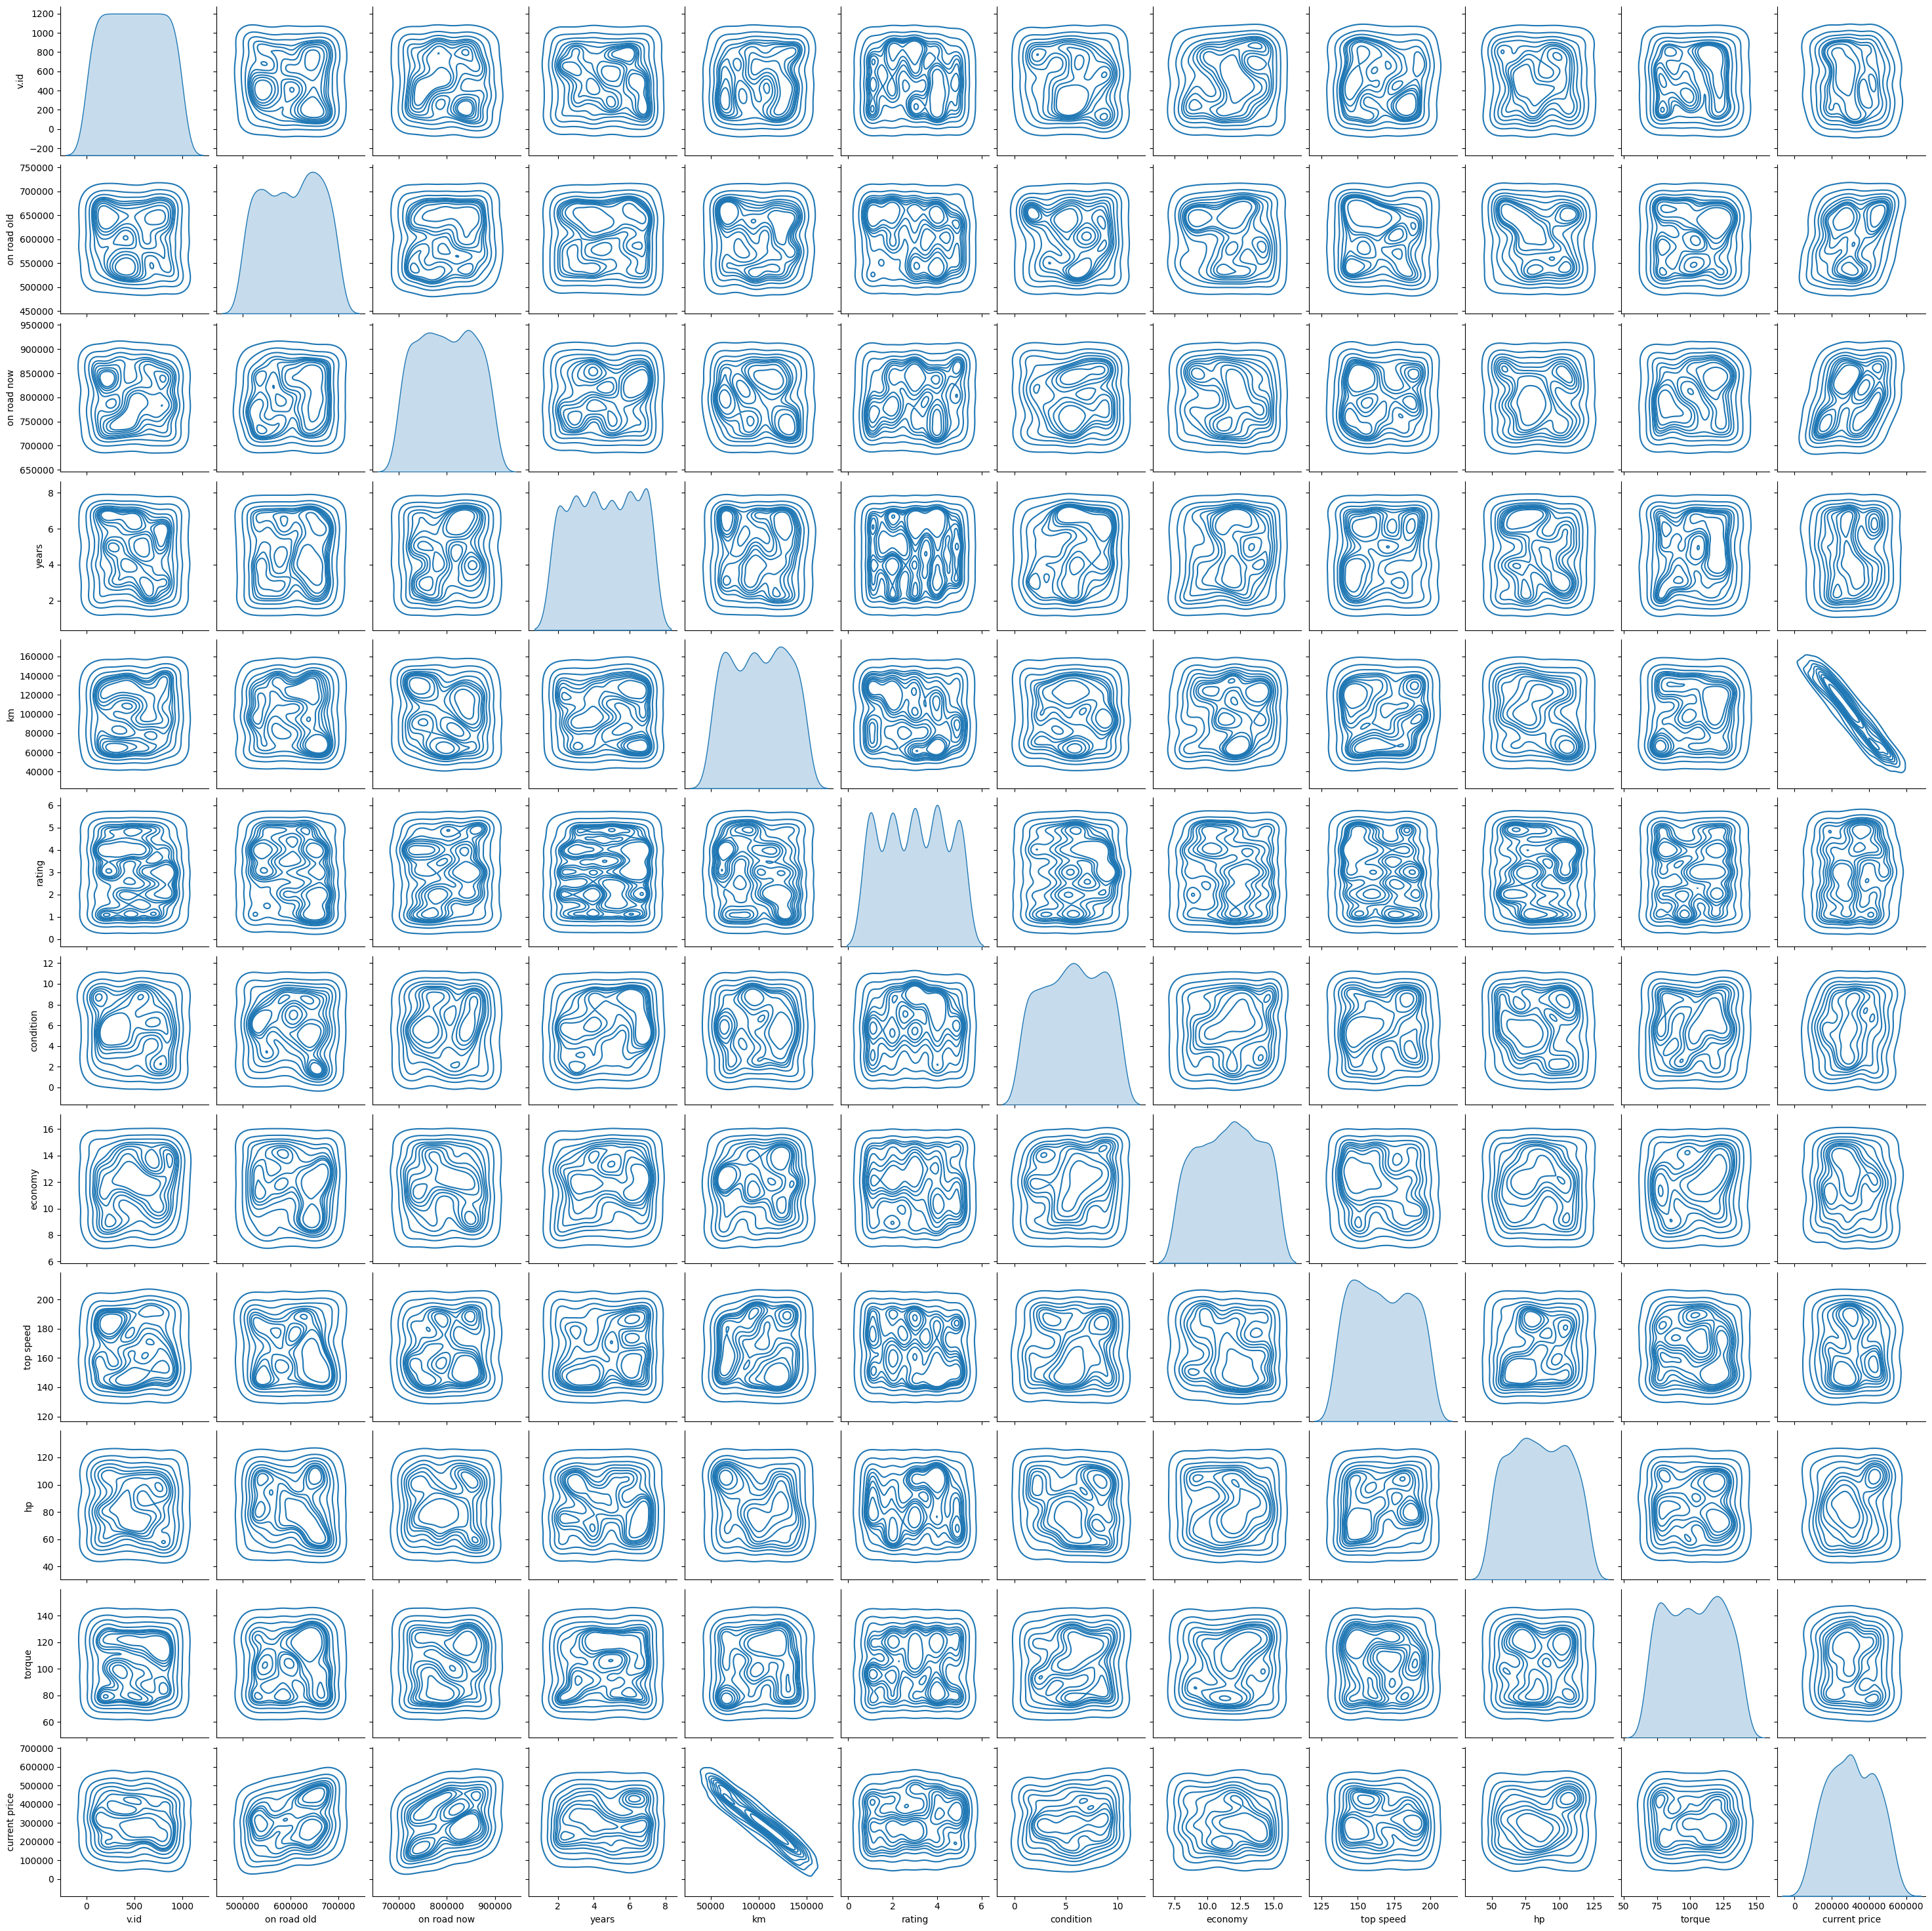

In [48]:
sns.pairplot(df[['v.id','on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque','current price']],kind='kde')

In [7]:
new_df=df.drop(['on road old','on road now','v.id','current price'],axis=1)

In [8]:
new_df

years      km  rating  condition  economy  top speed   hp  torque
0        3   78945       1          2       14        177   73     123
1        6  117220       5          9        9        148   74      95
2        2  132538       2          8       15        181   53      97
3        4  101065       4          3       11        197   54     116
4        6   61559       3          9       12        160   53     105
..     ...     ...     ...        ...      ...        ...  ...     ...
995      5  125092       1          6       11        171   95      97
996      4   83370       2          9       14        161  101     120
997      7   86722       1          8        9        196  113      89
998      2  140478       4          5        9        184  112     128
999      5   67295       4          2        8        199   99      96

[1000 rows x 8 columns]

In [9]:
target=df['current price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
 new_df, target, test_size=0.33, random_state=42)

In [11]:
X_train,y_train

(     years      km  rating  condition  economy  top speed   hp  torque
 703      4  116286       2         10       11        144   77     112
 311      2   65706       4         10        8        148   84      75
 722      6   96565       4          2        8        166   87     140
 629      5   91449       5         10       11        149   70     120
 0        3   78945       1          2       14        177   73     123
 ..     ...     ...     ...        ...      ...        ...  ...     ...
 106      4   66514       3         10       13        139   50      69
 270      5   78154       5          6       10        165  100     124
 860      2  136449       2          6       15        192  120     136
 435      3   96686       5          4       10        190  115     140
 102      2  118272       4         10        9        152  118      79
 
 [670 rows x 8 columns],
 703    249603.0
 311    423507.0
 722    305002.5
 629    402812.5
 0      351318.0
          ...   
 106   

In [18]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [19]:
from tensorflow.keras import layers 

In [20]:
from tensorflow.keras.layers import Normalization

In [21]:
model=tf.keras.Sequential()

In [22]:
model.add(normalizer)
model.add(layers.Dense(10,activation='tanh'))
model.add(layers.Dense(60,activation='tanh'))
model.add(layers.Dense(1))

In [42]:
model.compile(loss='huber',optimizer='adam',metrics='mae')

In [43]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
21/21 [==============================] - 1s 4ms/step - loss: 309359.1875 - mae: 309359.6875
Epoch 2/20
21/21 [==============================] - 0s 2ms/step - loss: 309357.7188 - mae: 309358.2188
Epoch 3/20
21/21 [==============================] - 0s 2ms/step - loss: 309356.2812 - mae: 309356.7812
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 309354.8750 - mae: 309355.4062
Epoch 5/20
21/21 [==============================] - 0s 2ms/step - loss: 309353.5312 - mae: 309354.0625
Epoch 6/20
21/21 [==============================] - 0s 2ms/step - loss: 309352.1562 - mae: 309352.6562
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 309350.9062 - mae: 309351.4062
Epoch 8/20
21/21 [==============================] - 0s 3ms/step - loss: 309349.5625 - mae: 309350.0625
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 309348.2812 - mae: 309348.7812
Epoch 10/20
21/21 [==============================] - 0s 4ms/step - loss: 

In [44]:
y_pred=model.predict(X_test[:1])

1/1 [==============================] - 0s 119ms/step


In [45]:
y_pred

array([[75.35209]], dtype=float32)

In [46]:
X_test[:1]

years     km  rating  condition  economy  top speed   hp  torque
521      3  82191       5          1        9        139  107      99

In [47]:
 y_test[:1]

521    383570.5
Name: current price, dtype: float64